In [1]:
# importing general necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# EDA-Helper libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset and making some adjustments so it works with the model and the time series split
df = pd.read_csv("../data/combined_dataset_temp.csv").drop(columns=["Unnamed: 0", "GAUL", "M49"])
df["Casualties"] = df["Casualties"].fillna(0)
df["Undernourishment (%)"] = df["Undernourishment (%)"].replace({"<2.5": 0})

df["Undernourishment (%)"] = pd.to_numeric(df["Undernourishment (%)"]).shift(periods=-1)
df = df.drop(index=df.index[19::20])
df = df.dropna().sort_values("Year")

df["Undernourishment (%)"] = df["Undernourishment (%)"].apply(lambda x: x*10)
df["Undernourishment (%)"] = df["Undernourishment (%)"].astype(int)

In [4]:
# Creating X and y and scaling (NDVI can be negative, thats why X needs to be scaled with the min/max scaler between 0 and 1)
sc = MinMaxScaler()

df_model_all_f = df.drop(columns=["Area", "Year"])
df_model_best_f = df.drop(columns=["Area", "Year", "GDP (MUSD)", "Food Prod. Index"])

df_model_x_all = sc.fit_transform(df_model_all_f[["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_all = pd.DataFrame(df_model_x_all, columns=["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"])

df_model_x_best = sc.fit_transform(df_model_best_f[["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_best = pd.DataFrame(df_model_x_best, columns=["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"])

y_all = df_model_all_f["Undernourishment (%)"]
y_best = df_model_best_f["Undernourishment (%)"]

X_all = df_model_x_all
X_best = df_model_x_best

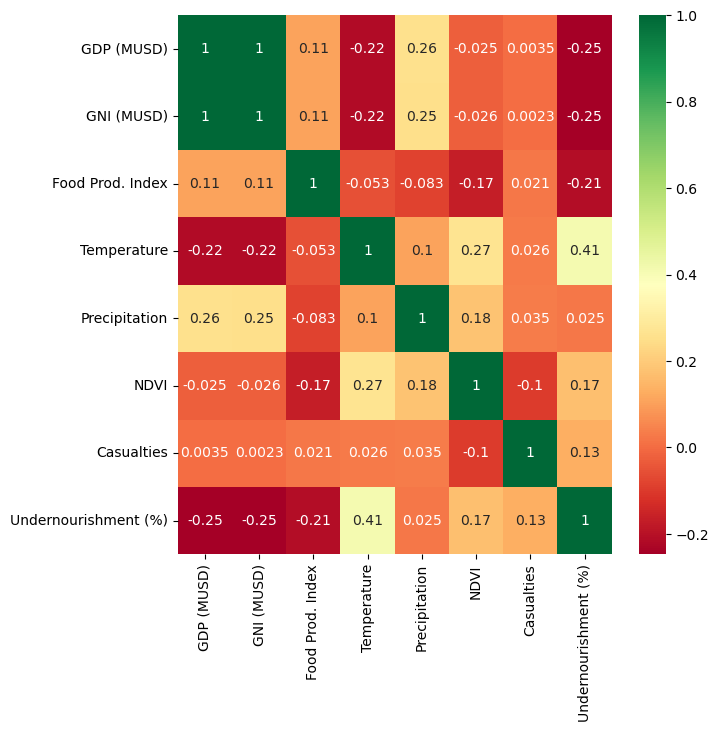

In [22]:
# correlations of each feature in the dataset including the target variable
corrmat = df_model_all_f.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

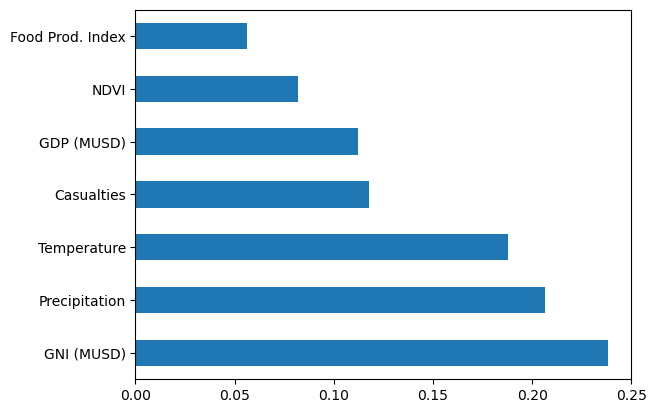

In [15]:
# feature importances in the model later used (all features)
model = RandomForestRegressor()
model.fit(X_all, y_all)

feat_importances = pd.Series(model.feature_importances_, index=X_all.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

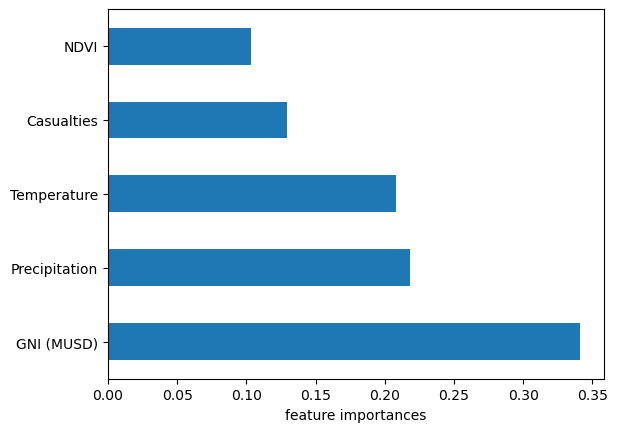

In [21]:
# feature importances in the model later used (excluding GDP and Food Production Index)
model = RandomForestRegressor()
model.fit(X_best, y_best)

feat_importances = pd.Series(model.feature_importances_, index=X_best.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("feature importances")
plt.show()